In [8]:
import pandas as pd
import numpy as np
from Data_Cleaning_v import datacleanprep

In [5]:
df=pd.read_csv('train.csv',index_col=0)

In [9]:
df = datacleanprep('train.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
CabinC      891 non-null int64
CabinN      891 non-null float64
dtypes: float64(3), int64(8)
memory usage: 83.5 KB


In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinC,CabinN
PassengerId,,,,,,,,,,,
1,0,3,1,1,22.0,1,0,7.2500,1,0,0.0
2,1,1,2,0,38.0,1,0,71.2833,0,3,85.0
3,1,3,3,0,26.0,0,0,7.9250,1,0,0.0
4,1,1,2,0,35.0,1,0,53.1000,1,3,123.0
5,0,3,1,1,35.0,0,0,8.0500,1,0,0.0


In [ ]:
# separate the target column
y = df.pop('Survived')

#### From now on, I will do a series of tests for JUDGING WHAT MODEL TO CHOOSE for ML on this dataset

In [29]:
# start with plain cleaned data and try 3 ML models
# first one is linear model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=0, tol=1e-4,max_iter=500)

### Train-Test Split: procedure for initial testing of a ML model as benchmark--
#### Use the same, simple, one split of 30%(testing)- 70%(training) to the dataset 
#### Use the same training to train different ML models, evaluate based on same testing dataset.
#### Based on performance, choose the final ML model to further the work

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3,random_state=22)
# divide train-test split

In [30]:
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=500,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
y_pred = clf.predict(X_test)

### Benchmark accuracy (Null Accuracy): 
#### The accuracy that if a model only predicts the majority class for all predictions. This can be the based case we can always compare to

In [32]:
print(" The Null accuracy is:",(len(df)-sum(y.values))/len(df)*100,"%")

 The Null accuracy is: 61.61616161616161 %


### Evaluate Model Performance:(Linear SGD)

In [33]:
from sklearn import metrics
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
#def>> Classification Accuracy: Overall, how often is the classifier correct?

Classification Accuracy is : 76.49253731343283 %


In [38]:
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")
# def>> Classification Error: Overall, how often is the classifier incorrect?

Confusion Matrix is:
 [[123  41]
 [ 22  82]]
Classification Error is:
 23.507462686567166 %


###  Confusion Matrix : a way to check the quality of classification predicitions out of a ML model
##### Confusion Matrix is composed of four sections, which are : TN(True Negative)/TP(True Positive)/FN(False Negative)/FP(False Positive)

| n=891               | Predicted: Deceased(0) | Predicted : Survived(1) |
|---------------------|------------------------|-------------------------|
| Actual: Deceased(0) | # of TN                | # of FP                 |
| Actual: Survived(1) | # of FN                | # of TP                 |

#### Definitions:
##### True Positive(TP):These are cases in which we predicted Survival(1), and they did survive(1).
##### True negatives (TN): We predicted they died(0), and they did (0).
##### False positives (FP): We predicted that they died(0), but they actually did not(1). (Also known as a "Type I error.")
##### False negatives (FN): We predicted they survived(1), but they actually died(0). (Also known as a "Type II error.")

##### There are also quite some other scores that can be calculated :
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

#### Here , I would prefer to use the full confusion matrix to observe model performance on predicting accurate results

In [ ]:
# Test second model:  LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=22, solver='lbfgs', max_iter=300)

In [40]:
clf1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=22, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Evaluate Model Performance:(Logistic Regression)

In [41]:
y_pred=clf1.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 79.8507462686567 %
Confusion Matrix is:
 [[139  25]
 [ 29  75]]
Classification Error is:
 20.149253731343293 %


In [49]:
# Test 2nd model:  Decision Tree 
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=7,random_state=22)

In [50]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=22,
            splitter='best')

### Evaluate Model Performance:(Decision Tree)

In [51]:
y_pred=clf2.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 79.8507462686567 %
Confusion Matrix is:
 [[137  27]
 [ 27  77]]
Classification Error is:
 20.149253731343293 %


In [42]:
# Test 3rd model:  Random Forest (Ensemble)
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=80, max_depth=6,random_state=22)

In [43]:
clf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

### Evaluate Model Performance:(Random forest Classifier)

In [44]:
y_pred=clf3.predict(X_test)
print("Classification Accuracy is :",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Confusion Matrix is:\n",metrics.confusion_matrix(y_test, y_pred))
print("Classification Error is:\n",100-metrics.accuracy_score(y_test, y_pred)*100,"%")

Classification Accuracy is : 79.8507462686567 %
Confusion Matrix is:
 [[142  22]
 [ 32  72]]
Classification Error is:
 20.149253731343293 %


### Compare Model Performance based on the stability of the model(free from OVERFITTING??)
### -- Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score 

In [36]:
# measure validation score : case 0 -- Linear SVC
scores0 = cross_val_score(clf,df,y,cv=5)

In [45]:
# measure validation score : case 1 -- Logistic Regression
scores1 = cross_val_score(clf1,df,y,cv=5)

In [52]:
# measure validation score : case 2 -- Desicion Tree
scores2 = cross_val_score(clf2,df,y,cv=5)

In [47]:
# measure validation score : case 3 -- Random Forest
scores3 = cross_val_score(clf3,df,y,cv=5)

In [48]:
## Plot the 5-fold cross validation to compare model stability
import matplotlib.pyplot as plt

Text(0.5, 0, 'cv number')

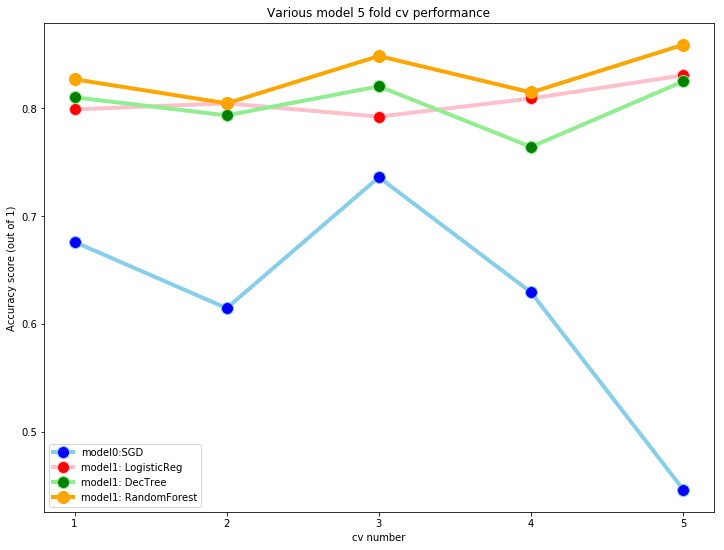

In [74]:
plt.figure(figsize=(12,9))
x = np.linspace(1,5,5)
plt.plot(x,scores0,marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label = 'model0:SGD')
plt.plot(x,scores1,marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=4, label = 'model1: LogisticReg')
plt.plot(x,scores2,marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4, label = 'model1: DecTree')
plt.plot(x,scores3,marker='o', markerfacecolor='orange', markersize=12, color='orange', linewidth=4, label = 'model1: RandomForest')
plt.legend()
plt.xticks([1,2,3,4,5])
plt.title('Various model 5 fold cv performance')
plt.ylabel('Accuracy score (out of 1)')
plt.xlabel('cv number')

#### We can see that Logistic Regression model and Random forest model perform much stable than SGD. And  Decision Tree model is probably larger variance in the 3 models which performs better.

In [76]:
# print the average accuracy out of the 5 fold
print("average Accuracy score SGD model:",np.mean(scores0)*100,"%")
print("average Accuracy score LogisticRegression model:",np.mean(scores1)*100,"%")
print("average Accuracy score Decision Tree model:",np.mean(scores2)*100,"%")
print("average Accuracy score Random Forest model:",np.mean(scores3)*100,"%")

average Accuracy score SGD model: 62.03998032475502 %
average Accuracy score LogisticRegression model: 80.69968050778303 %
average Accuracy score Decision Tree model: 80.24960750581516 %
average Accuracy score Random Forest model: 83.05926653325233 %


### Based on these simple tests, I will proceed with Random Forest model. I will use initial test as benchmark, test later improvements based on it.

| Model Type | Parameters | Classification Accuracy(%) | Confusion Matrix |
| --- | --- | --- | --- |
| Pure Guess | Guess based on Majority(Deceased) | 61.62 | [[549,0][342,0]]|
| Random Forest | Default cleaned data, gini, max depth=6, 80 estimators | average 83.06 | [[142,22][32,72]]|